# <center> TensorFlow </center>
## <center>2.3 Weights and Biases</center>


# Explanation

The specification of what a layer does to its input data is stored in the layer’s
__weights__, which in essence are a bunch of numbers. In technical terms, you would say
that the transformation implemented by a layer is "parametrized" by its weights.
In fact, weights are also sometimes called the "parameters" of a layer. <br>
In this context, "learning" will mean finding a set of values for the weights of all layers in a network, such that the
network will correctly map your example inputs to their associated targets. But here’s the
thing: a deep neural network can contain tens of millions of parameters. Finding the
correct value for all of them may seem like a daunting task, especially since modifying
the value of one parameter will affect the behavior of all others!
<br>
<img src="img/weights.jpg" width="50%" /><br>


In [1]:
import argparse
import sys
import tensorflow
FLAGS = None

parser = argparse.ArgumentParser()
parser.add_argument('--data_dir', type=str, default='/tmp/tensorflow/mnist/input_data',
                    help='Directory for storing input data')
FLAGS, unparsed = parser.parse_known_args()

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(FLAGS.data_dir, one_hot=True)
import matplotlib.pyplot as plt
import numpy as np
import random as ran

def TRAIN_SIZE(num):
    #print ('Total Training Images in Dataset = ' + str(mnist.train.images.shape))
    #print ('--------------------------------------------------')
    x_train = mnist.train.images[:num,:]
    #print ('x_train Examples Loaded = ' + str(x_train.shape))
    y_train = mnist.train.labels[:num,:]
    #print ('y_train Examples Loaded = ' + str(y_train.shape))
    #print('')
    return x_train, y_train

def TEST_SIZE(num):
    #print ('Total Test Examples in Dataset = ' + str(mnist.test.images.shape))
    #print ('--------------------------------------------------')
    x_test = mnist.test.images[:num,:]
    #print ('x_test Examples Loaded = ' + str(x_test.shape))
    y_test = mnist.test.labels[:num,:]
    #print ('y_test Examples Loaded = ' + str(y_test.shape))
    return x_test, y_test

def display_digit(num):
    print(y_train[num])
    label = y_train[num].argmax(axis=0)
    image = x_train[num].reshape([28,28])
    plt.title('Example: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()

def display_mult_flat(start, stop):
    images = x_train[start].reshape([1,784])
    for i in range(start+1,stop):
        images = np.concatenate((images, x_train[i].reshape([1,784])))
    plt.imshow(images, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
x_train, y_train = TRAIN_SIZE(55000)

import tensorflow as tf
sess = tf.Session()
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

Extracting /tmp/tensorflow/mnist/input_data\train-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\train-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-labels-idx1-ubyte.gz


# Example

In the next step, we will define the weights W and bias b. These two values are the grunt workers of the classifier. They will be the only values we will need to calculate our prediction after the classifier is trained.

We will first set our weight and bias values to zeros because TensorFlow will optimize these values later. Notice how our W is a collection of 784 values for each of the 10 classes.

In [3]:
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

You can think of the weights as 10 cheat sheets for each number, which is similar to how a teacher uses a cheat sheet transparency to grade a multiple choice exam.
<br> <br>The bias is a little beyond the scope of this workshop, but you can think of it as a special relationship with the weights that influences the final answer.
<br> <br>
We will now define y, which is our classifier function.  We make our prediction by multiplying each flattened digit by our weight and then adding our bias. __Matmul__ is the function for multiplying matrices.

In [4]:
y = tf.nn.softmax(tf.matmul(x,W) + b)

## in a graph:
<img src="https://www.tensorflow.org/versions/master/images/softmax-regression-scalargraph.png" width = "60%"/>

## in a vector equation:
<img src="https://www.tensorflow.org/versions/master/images/softmax-regression-vectorequation.png" width = "60%"/>

In [5]:
print(y)

Tensor("Softmax:0", shape=(?, 10), dtype=float32)


In [6]:
x_train, y_train = TRAIN_SIZE(3)
sess.run(tf.global_variables_initializer())
sess.run(y, feed_dict={x: x_train})
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
x_train, y_train = TRAIN_SIZE(5500)
x_test, y_test = TEST_SIZE(10000)
LEARNING_RATE = 0.1
TRAIN_STEPS = 2500
init = tf.global_variables_initializer()
sess.run(init)
training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
for i in range(TRAIN_STEPS+1):
    sess.run(training, feed_dict={x: x_train, y_: y_train})
    if i%100 == 0:
        print('Training Step:' + str(i) + '  Accuracy =  ' + str(sess.run(accuracy, feed_dict={x: x_test, y_: y_test})) + '  Loss = ' + str(sess.run(cross_entropy, {x: x_train, y_: y_train})))

Training Step:0  Accuracy =  0.5988  Loss = 2.1882
Training Step:100  Accuracy =  0.8647  Loss = 0.580297
Training Step:200  Accuracy =  0.879  Loss = 0.459822
Training Step:300  Accuracy =  0.8866  Loss = 0.408572
Training Step:400  Accuracy =  0.8904  Loss = 0.378081
Training Step:500  Accuracy =  0.8943  Loss = 0.356976
Training Step:600  Accuracy =  0.8974  Loss = 0.34105
Training Step:700  Accuracy =  0.8984  Loss = 0.32835
Training Step:800  Accuracy =  0.9  Loss = 0.317827
Training Step:900  Accuracy =  0.9005  Loss = 0.308862
Training Step:1000  Accuracy =  0.9009  Loss = 0.301065
Training Step:1100  Accuracy =  0.9023  Loss = 0.29417
Training Step:1200  Accuracy =  0.9029  Loss = 0.287995
Training Step:1300  Accuracy =  0.9033  Loss = 0.282406
Training Step:1400  Accuracy =  0.9039  Loss = 0.277303
Training Step:1500  Accuracy =  0.9048  Loss = 0.27261
Training Step:1600  Accuracy =  0.9057  Loss = 0.268267
Training Step:1700  Accuracy =  0.9062  Loss = 0.264226
Training Step:

# Weights
<img src="img/Weights.png" width = "50%"/><br>
In this image, if the red pixel is filled, the digit being classified is very likely to be a one, thus has positive weight. <br>
On the right side, if the blue pixel is filled, the digit being classified is very likely not a zero, thus has negative weight.  
<br>
After we have calculated our weight cheatsheet, we can create a graph with the following code:

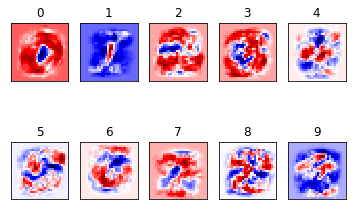

In [7]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = sess.run(W)[:,i]
    plt.title(i)
    plt.imshow(weight.reshape([28,28]), cmap=plt.get_cmap('seismic'))
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)
plt.show()

This is a visualization of our weights from 0-9, which is the most important aspect of our classifier. The bulk of the work of machine learning is figuring out what the optimal weights are. Once they are calculated, you have the “cheat sheet” and can easily find answers. 

This is why neural networks can be easily used within mobile devices, as  the model, once trained, doesn’t take up that much room to store or computing power to calculate. 

Our classifier makes its prediction by comparing how similar or different the digit is to the red and blue. <br>You can think the darker the red, the better of a hit; white as neutral; and blue as misses.

So, now that we have our cheat sheet, let’s load one example and apply our classifier to that one example.

[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


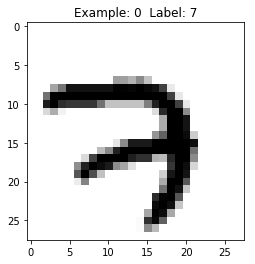

In [8]:
x_train, y_train = TRAIN_SIZE(1)
display_digit(0)

Let’s look at our predictor y. 
This gives us a (1x10) matrix with each column containing one probability.

In [9]:
answer = sess.run(y, feed_dict={x: x_train})
print(answer)

[[  2.12480318e-05   1.16469255e-05   8.96317363e-02   1.92015339e-02
    8.20864108e-04   1.25168190e-05   3.85382300e-05   8.53746057e-01
    6.91888854e-03   2.95969490e-02]]


This is not very useful for us. So, we use the __argmax__ function to return the position of the highest value and that gives us our prediction.

In [10]:
answer.argmax()

7

Let's create a function to make predictions on a random digit in this data set.

In [11]:
def display_compare(num):
    # THIS WILL LOAD ONE TRAINING EXAMPLE
    x_train = mnist.train.images[num,:].reshape(1,784)
    y_train = mnist.train.labels[num,:]
    # THIS GETS OUR LABEL AS A INTEGER
    label = y_train.argmax()
    # THIS GETS OUR PREDICTION AS A INTEGER
    prediction = sess.run(y, feed_dict={x: x_train}).argmax()
    plt.title('Prediction: %d Label: %d' % (prediction, label))
    plt.imshow(x_train.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
    plt.show()

Now, let's try out the function. 

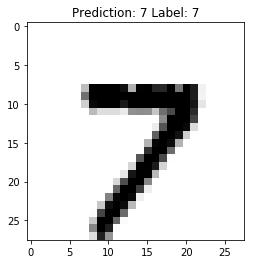

In [12]:
display_compare(ran.randint(0, 55000))

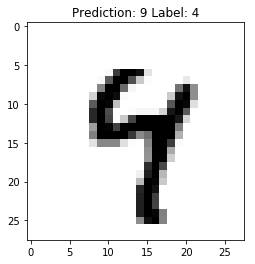

In [13]:
display_compare(2)

Here, the digit has been predicted incorrectly.  

Why do you think it got it wrong?

Notice what happens to the visualizations of the weights when you use 1-10 training examples. It becomes clear that using too little data makes it very hard to generalize. Here is an animation showing how the weights change as you increase your training size. 

<img src="img/a.gif" width = "65%" />

# Feedback
<a href = "http://goto/ml101_doc/Tensorflow03">Feedback: Weights and biases</a> <br>

# Navigation
<br>

<div>
<span> <h3 style="display:inline">&lt;&lt; Prev: <a href = "tensorflow02.ipynb">Structure</a></h3> </span>
</div>